In [3]:
from utilityFunctions import load_csv_to_matrix_batch, compute_color_preference_distance_batch, show_heatmaps, compute_color_similarity_distance_batch, compute_correlations, RSA, split_and_average_matrices, perform_mds_and_plot
from utilityFunctions_GWOT import compute_GWOT_for_all_pairs
import numpy as np
import pickle
import os
import random

In [4]:
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)
folder_path = 'raw_data/202411_data'

In [5]:
filename = "list_average_of_all_possible_splitting_preference.pkl"

if os.path.exists(filename):
    with open(filename, "rb") as file:
        grouping_averaged_allcombination_preference = pickle.load(file)
    print("Results successfully loaded.")
else:
    print(f"Error: The file '{filename}' does not exist.")

print(type(grouping_averaged_allcombination_preference))
print(len(grouping_averaged_allcombination_preference))
print(len(grouping_averaged_allcombination_preference[0]))
print(type(grouping_averaged_allcombination_preference[0][0]))

Results successfully loaded.
<class 'list'>
923780
2
<class 'numpy.ndarray'>


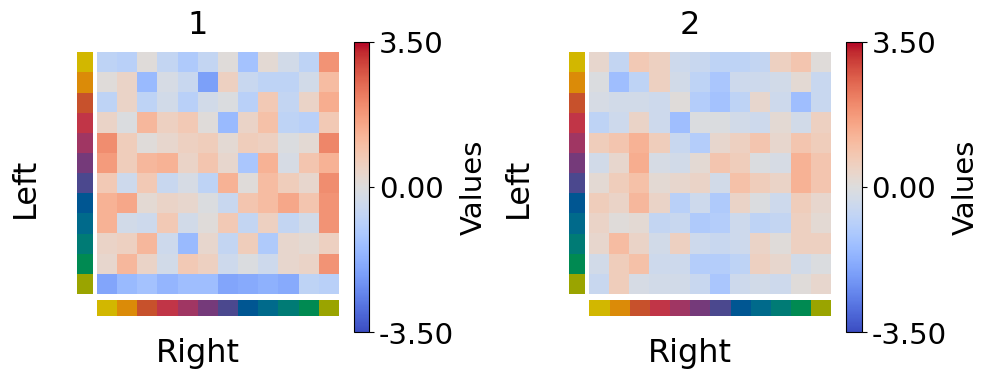

In [6]:
pair_of_preference = grouping_averaged_allcombination_preference[0]
show_heatmaps(vmin_val=-3.5, vmax_val=3.5, matrices=list(pair_of_preference), titles=list(range(1, 3)), nrows=1, ncols=2, cmap_name = "coolwarm", cbar_label="Values", color_labels=unique_colours)

In [7]:
filename = "list_average_of_all_possible_splitting_preference_distance.pkl"

if os.path.exists(filename):
    with open(filename, "rb") as file:
        grouping_averaged_allcombination_preference_distance = pickle.load(file)
    print("Results successfully loaded.")
else:
    print(f"Error: The file '{filename}' does not exist.")

print(type(grouping_averaged_allcombination_preference_distance))
print(len(grouping_averaged_allcombination_preference_distance))
print(len(grouping_averaged_allcombination_preference_distance[0]))
print(type(grouping_averaged_allcombination_preference_distance[0][0]))

Results successfully loaded.
<class 'list'>
923780
2
<class 'numpy.ndarray'>


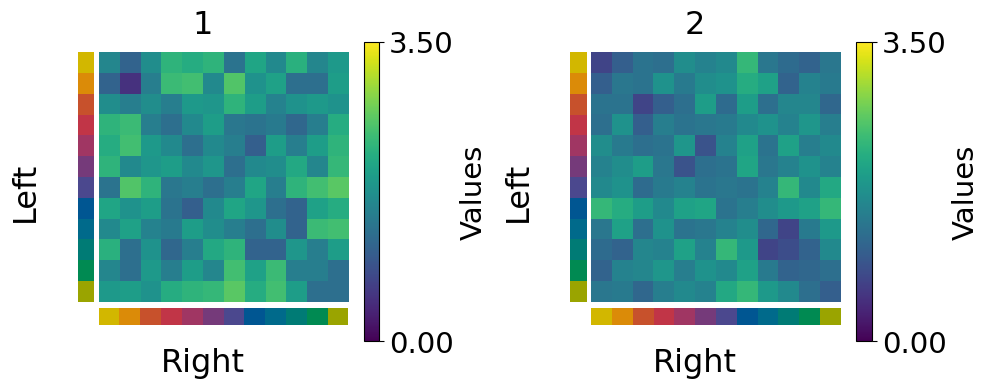

In [8]:
pair_of_preference_distance = grouping_averaged_allcombination_preference_distance[0]
show_heatmaps(vmin_val=0, vmax_val=3.5, matrices=list(pair_of_preference_distance), titles=list(range(1, 3)), nrows=1, ncols=2, cmap_name="viridis", cbar_label="Values", color_labels=unique_colours)

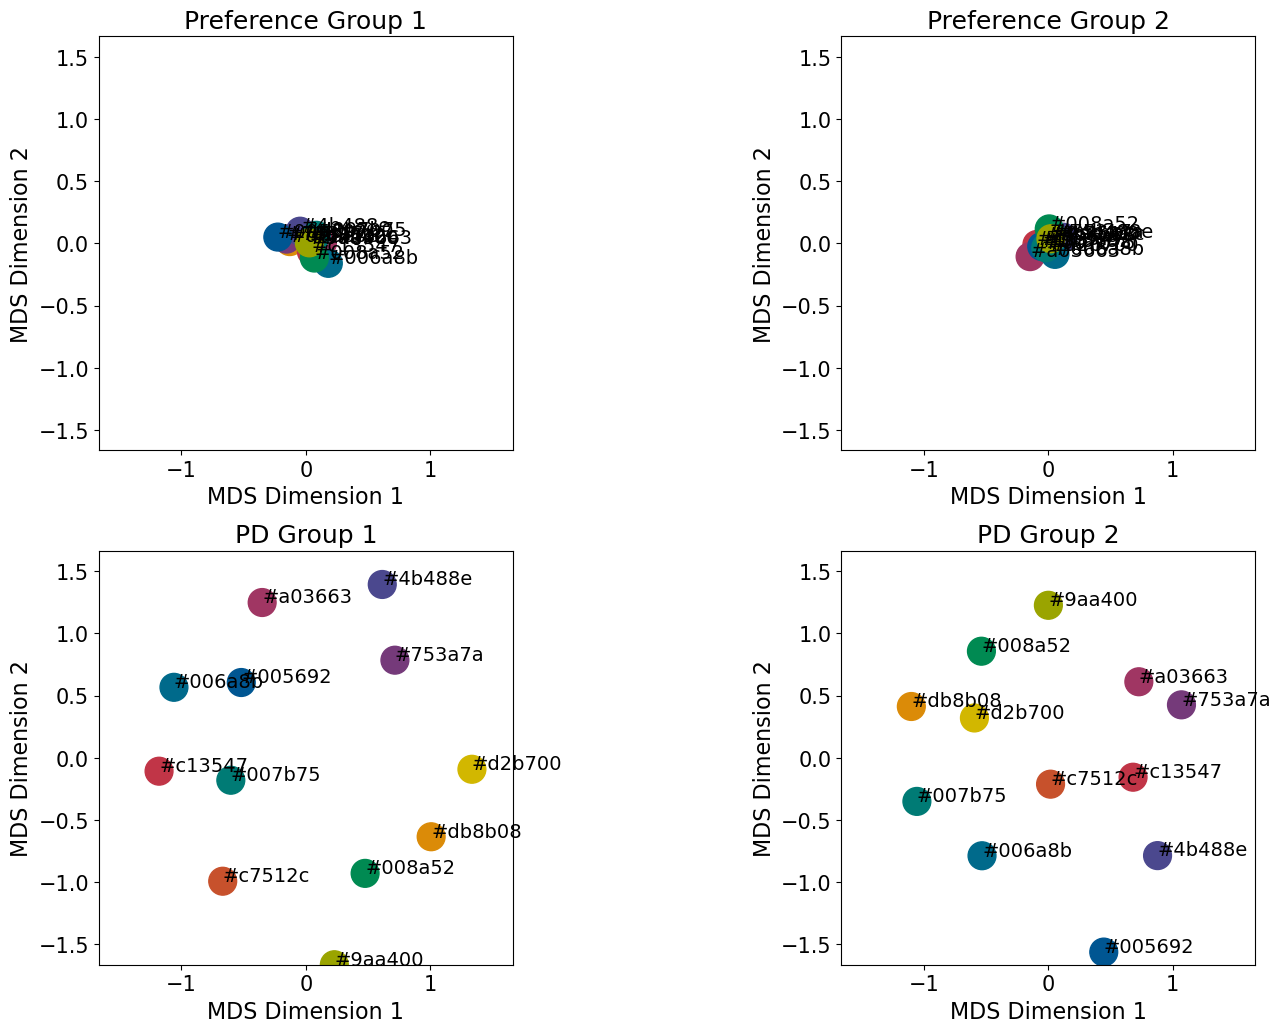

In [9]:
preference_list = pair_of_preference + pair_of_preference_distance
perform_mds_and_plot(matrices = preference_list, titles = ["Preference Group 1", "Preference Group 2", "PD Group 1", "PD Group 2"], colour_index = colour_index, n_rows = 3, n_cols = 2, n_components=2)